# Edge Detection - Scikit Image

Basic edge detection with SciKit. Initially, images are processed by threshold manipulation and compared. Basic application of Canny edge detection and watershed segmentation are applied to the original image and compared with the threshold method.

In [1]:
from skimage import data
from skimage.exposure import histogram, is_low_contrast
from skimage.util import img_as_ubyte
from random import randint
import matplotlib.pyplot as plt

# get image as unsigned byte and produce histogram
coins = img_as_ubyte(data.coins())
hist, hist_centers = histogram(coins, nbins=256)

# graphing: 1 row, 2 columns for image and histogram plot
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

# binary image edge deterction - guess
guess = randint(100,200)
binary_edges = coins > guess

ax[0].imshow(coins, cmap=plt.cm.gray)
#ax[0].axis('off')

ax[1].plot(hist_centers, hist)
ax[1].axvline(guess, color='r')
ax[1].set_title('Histogram of Grey Values')

ax[2].imshow(binary_edges, cmap=plt.cm.gray)

plt.show()

if is_low_contrast(coins):
    print("This image is low contrast!")

<Figure size 1500x500 with 3 Axes>

Producing a guess value (by means of `randint()` on the interval \[100,150\]) can be time-consuming and each binary image still does not yield a method for counting the objects. But what happens if the contrast is modified first? Using contrast stretching or equalization the original image will be enhanced to see if the resulting contour will be acceptable.



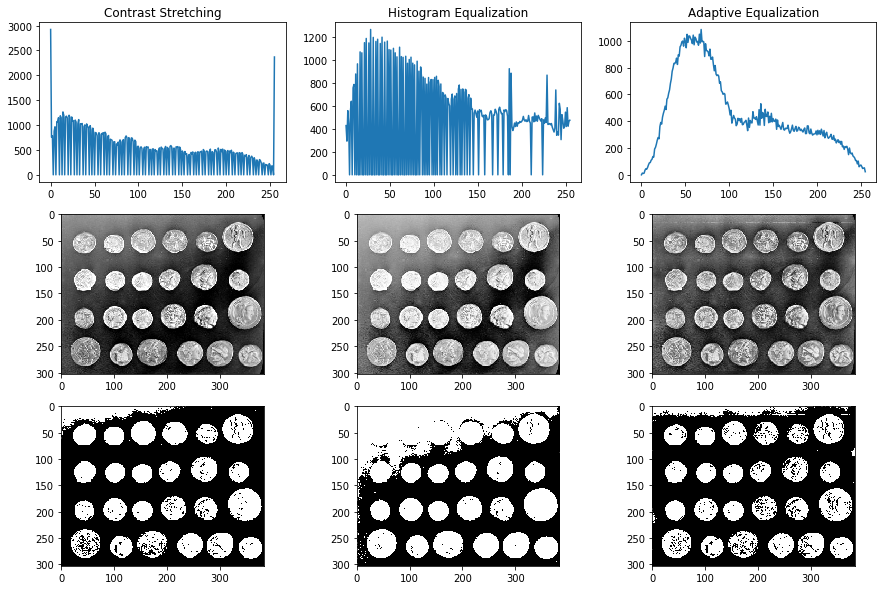

In [2]:
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist
import numpy as np

# make comparison table using subplots
# graphing: 3 row, 3 columns for image and histogram plot
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))

# contrast stretching
percent10, percent90 = np.percentile(coins, (2,98))
coins_rescale = rescale_intensity(coins, in_range=(percent10, percent90))
hist_rescale, hist_centers_rescale = histogram(coins_rescale)
binary_edges_rescale = coins_rescale > guess

# histogram equalization
coins_equal = equalize_hist(coins)
coins_equal = coins_equal*255
hist_equal, hist_centers_equal = histogram(coins_equal)
binary_edges_equal = coins_equal > guess

# adaptive equlaization
coins_adapt = equalize_adapthist(coins)
coins_adapt = coins_adapt*255
hist_adapt, hist_centers_adapt = histogram(coins_adapt)
binary_edges_adapt = coins_adapt > guess

# plot data and images
ax[0,0].plot(hist_centers_rescale, hist_rescale)
ax[0,0].set_title('Contrast Stretching')

ax[0,1].plot(hist_centers_equal, hist_equal)
ax[0,1].set_title('Histogram Equalization')

ax[0,2].plot(hist_centers_adapt, hist_adapt)
ax[0,2].set_title('Adaptive Equalization')

ax[1,0].imshow(coins_rescale, cmap=plt.cm.gray)
ax[1,1].imshow(coins_equal, cmap=plt.cm.gray)
ax[1,2].imshow(coins_adapt, cmap=plt.cm.gray)

ax[2,0].imshow(binary_edges_rescale, cmap=plt.cm.gray)
ax[2,1].imshow(binary_edges_equal, cmap=plt.cm.gray)
ax[2,2].imshow(binary_edges_adapt, cmap=plt.cm.gray)

plt.show()

None of these methods get the full outline of coins, although for some guess the contrast stretching and adaptive equlaization get close. An alternative method to detect edges is the Canny detector in `skimage` which will be applied to the image generated by histogram equalization. Then, hole detection will be used to find edges and small holes will be filled.

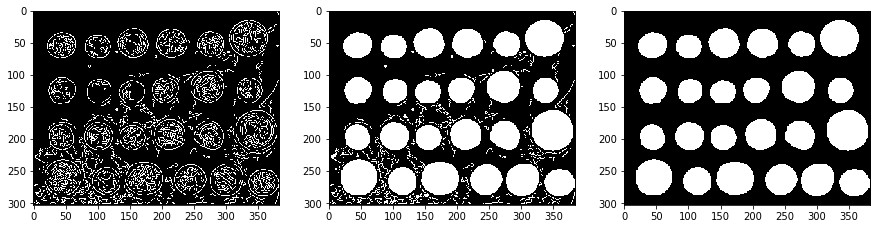

In [3]:
from skimage.feature import canny
from scipy import ndimage as ndi

# detect edges using Canny method
edges = canny(coins_equal/255)

# fill holes 
edges_filled = ndi.binary_fill_holes(edges)

# coin labels
coin_labels, nb_labels = ndi.label(edges_filled)
coin_sizes = np.bincount(coin_labels.ravel())
mask_size = coin_sizes > 100
mask_size[0] = 0
coin_cln = mask_size[coin_labels]

# comparison table using subplots
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

ax[0].imshow(edges, cmap=plt.cm.gray)
ax[1].imshow(edges_filled, cmap=plt.cm.gray)
ax[2].imshow(coin_cln, cmap=plt.cm.gray)

This edge detection scheme was applied with reasonable success. 